<a href="https://colab.research.google.com/github/Krushikkk/Cardiovascular_Risk_Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Cardiovascular Risk Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Krushik Kalavadiya
##### **Team Member 2 -** Kishan Hirapara


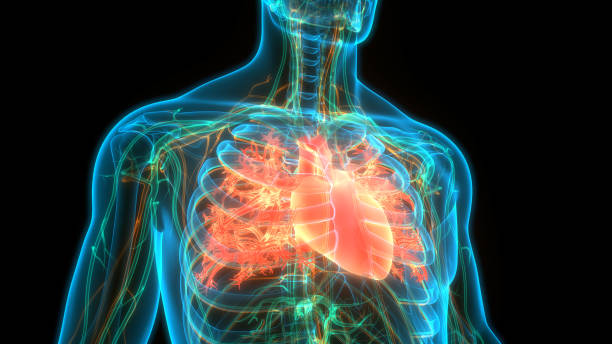

# **Project Summary -**

**1) Introduction**:

The Framingham Heart Study dataset provides patient information with 17 attributes, including demographic, behavioral, and medical risk factors of CHD. Cardiovascular risk prediction is crucial for early detection and prevention of cardiovascular diseases (CVDs) like coronary heart disease (CHD), which are the leading cause of death globally. By accurately predicting the likelihood of an individual developing CHD, healthcare professionals can provide targeted interventions, such as lifestyle modifications and medical treatments, to reduce the risk.



**2) Objective:** 

The objective is to build a classification model to predict whether the patient has a 10-year risk of future coronary heart disease (CHD) using demographic, behavioral, and medical risk factors. By achieving this objective, healthcare providers can identify patients at high risk of CHD early and take necessary preventive measures to reduce the incidence of CHD, thus improving patient health outcomes. 



**3) Approach**: 

1. Know the dataset
2. Understanding Your Variables
3. Data wrangling
4. EDA
5. Hypothesis testing
6. Feature Engineering & Data Pre-processing
7. ML model implementation 

   Logistic regression

   Random Forest Classifier

   XG Boost Classifier
8. Conclusion

# **GitHub Link -**

https://github.com/Krushikkk/Cardiovascular_Risk_Prediction

# **Problem Statement**


The challenge is to build a classification model that predicts whether a patient has a 10-year risk of future coronary heart disease (CHD) using demographic, behavioral, and medical risk factors. By achieving this objective, healthcare providers can identify patients at high risk of CHD early and take necessary preventive measures to reduce the incidence of CHD, thus improving patient health outcomes. 


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from seaborn.rcmod import set_style
sns.set_theme(style= 'whitegrid', palette = 'Set2')
from sklearn.impute import KNNImputer

# Sampling
from imblearn.over_sampling import RandomOverSampler

# Scaling
from sklearn.preprocessing import StandardScaler

# Import the model_selection module from scikit-learn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# Evaluation metrics
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# Import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [5]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Load Dataset
df_original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter Submission File Classification/data_cardiovascular_risk.csv')

In [7]:
# Copying data to preserve orignal file
df = df_original.copy()

### Dataset First View

In [8]:
# Dataset First 
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [10]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

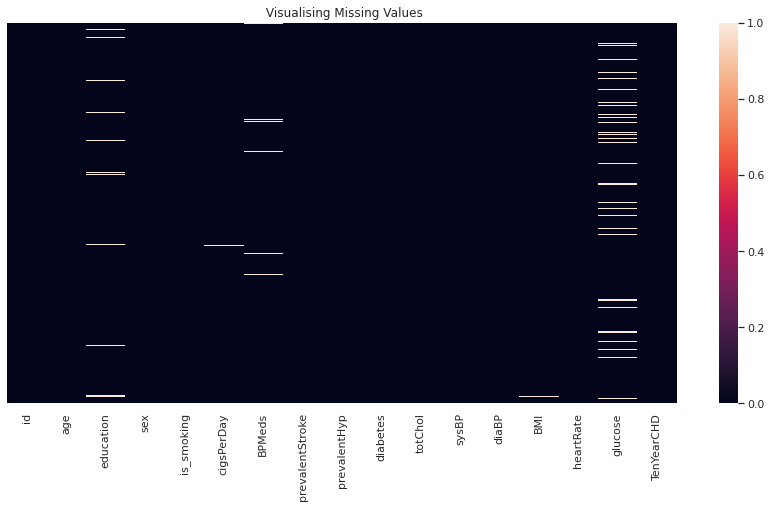

In [13]:
# Visualizing the missing values
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(), annot=False, yticklabels=False)
plt.title(" Visualising Missing Values")

### What did you know about your dataset?

In our dataset, there are seven columns with null values: education, cigsPerDay, BPMeds, totChol, BMI, heartRate, and glucose.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [15]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

**id**: A unique identifier for the patient, used to track the patient's record.

**education**: The level of education of the patient, which can be used as a proxy for socioeconomic status.

**Age**: The age of the patient in years.

**Sex (Gender)**: The biological gender of the patient, typically coded as "male" or "female."

**is_smoking**: A binary variable indicating whether the patient is currently a smoker (1) or not (0).

**Cigs Per Day**: The number of cigarettes smoked per day by the patient, if they are a current smoker.

**BP_Meds**: A binary variable indicating whether the patient is currently taking blood pressure medication (1) or not (0).

**Prevalent Stroke**: A binary variable indicating whether the patient has a history of stroke (1) or not (0).

**Prevalent hyp**: A binary variable indicating whether the patient has a history of hypertension (1) or not (0).

**Diabetes**: A binary variable indicating whether the patient has diabetes (1) or not (0).

**Tot Chol**: The total cholesterol level of the patient, measured in milligrams per deciliter (mg/dL).

**Sys BP**: The systolic blood pressure of the patient, measured in millimeters of mercury (mmHg).

**Dia BP**: The diastolic blood pressure of the patient, measured in millimeters of mercury (mmHg).

**BMI**: The Body Mass Index of the patient, calculated as weight (in kilograms) divided by height (in meters) squared.

**Heart Rate**: The heart rate of the patient, measured in beats per minute (BPM).

**glucose**: The glucose level in the blood, measured in milligrams per deciliter (mg/dL).

**TenyearCHD**: A binary variable indicating whether the patient has a 10-year risk of future coronary heart disease (CHD) (1) or not (0).


### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
# Rename columns
df.rename(columns = {'is_smoking':'smoking', 'TenYearCHD': 'Risk'}, inplace =True)
df.columns

Index(['id', 'age', 'education', 'sex', 'smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Risk'],
      dtype='object')

In [18]:
# Drop the unnesessary column and change data type
df.drop('id', axis = 1, inplace = True)

In [19]:
# Fill the null value in categorical columns

# Finding the most frequent value in BPMeds column
most_frequent_bpmeds = df['BPMeds'].mode()[0]

# Filling in null values with most frequent value
df['BPMeds'].fillna(most_frequent_bpmeds, inplace = True)

# Finding the most frequent value in education column
most_frequent_education = df['education'].mode()[0]

# Filling in null values with most frequent value
df['education'].fillna(most_frequent_education, inplace = True)

In [20]:
# Fill the null values in continous columns using KNNImupter

# Create an instance of the KNNImputer class
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer to the DataFrame
imputer.fit(df[['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']])

# Transform the DataFrame to fill in the null values
df[['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']] = imputer.transform(df[['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']])

In [21]:
df.isnull().sum()

age                0
education          0
sex                0
smoking            0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Risk               0
dtype: int64

### What all manipulations have you done and insights you found?

To prepare the dataset for further analysis and modeling, we first rename some column names for clarity and consistency. We then drop the "id" column since it contains all unique values and does not provide any useful information.

Next, we fill the null values in categorical columns with mode and in numerical columns with KNN imputer.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

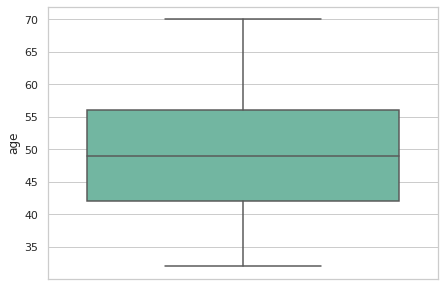

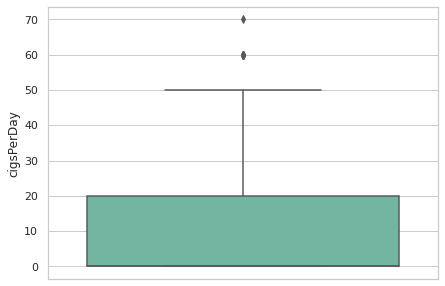

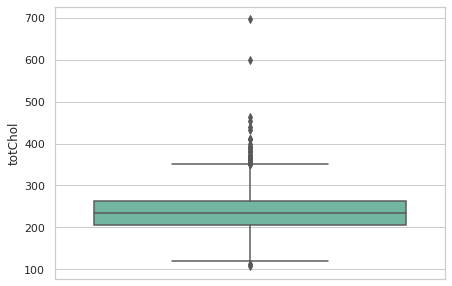

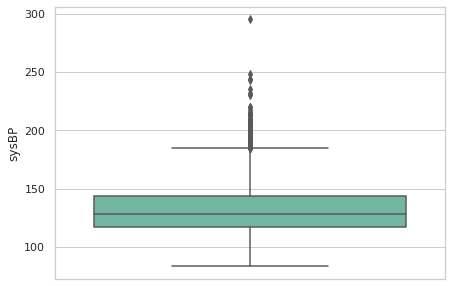

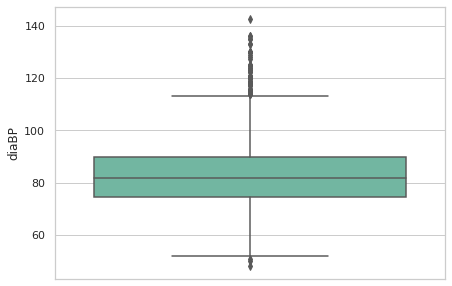

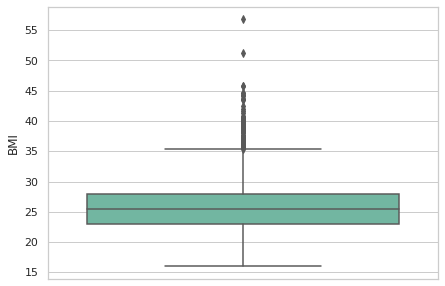

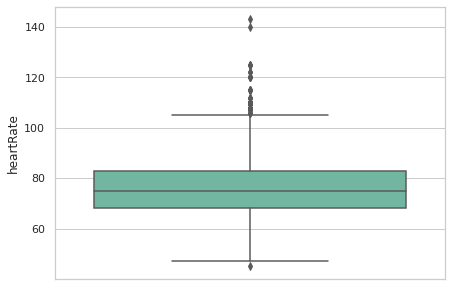

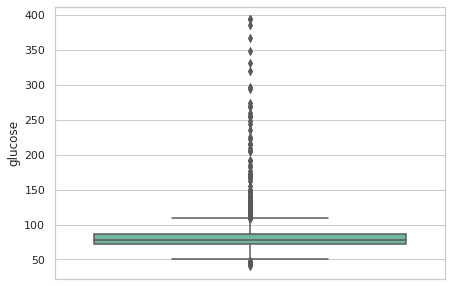

In [22]:
# Chart - 1 visualization code

num_var = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

# Numerical features plotting
for i in num_var:
    plt.figure(figsize=(7,5))  
    sns.boxplot(y = df[i])
    plt.show()

##### 1. Why did you pick the specific chart?

I picked the boxplot chart because it is a good way to visualize the distribution of numerical data. The boxplot also shows the quartiles, minimum and maximum values, and any outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

From the boxplots, we can see the distribution of the numerical variables and identify any outliers. For example, we can see that the 'glucose' variable has a large number of outliers. We can also see that the range of the 'age' variable is from 33 to 70.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If the dataset pertains to a healthcare business, identifying heavy smokers and individuals with high blood pressure could help in developing targeted interventions or preventative measures to improve their health outcomes. Similarly, understanding the distribution of glucose levels could help in identifying individuals at risk for diabetes and developing preventative measures or interventions to reduce that risk.

#### Chart - 2

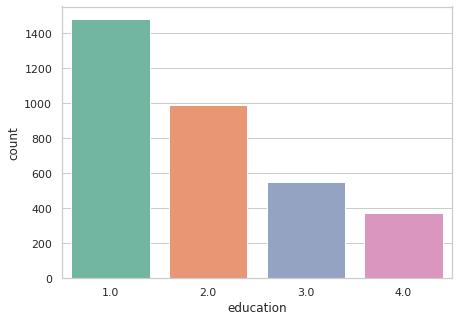

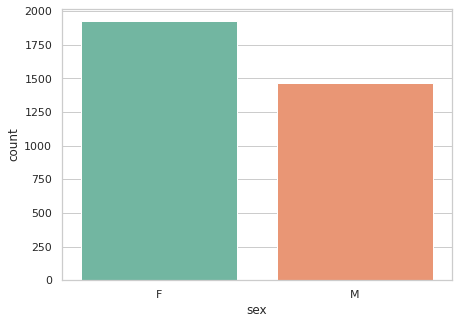

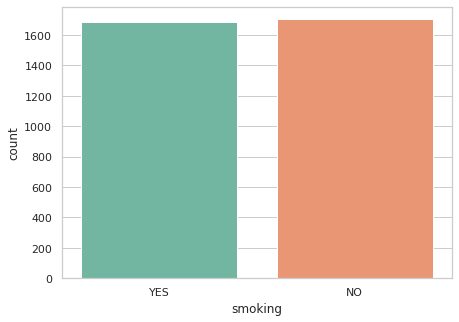

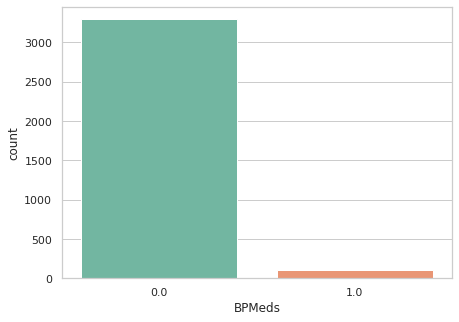

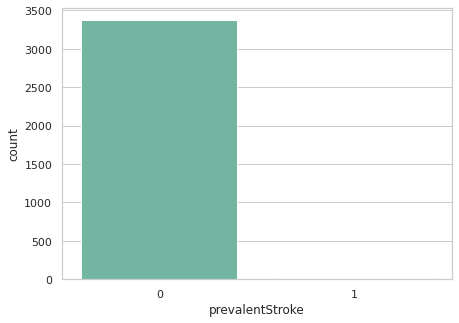

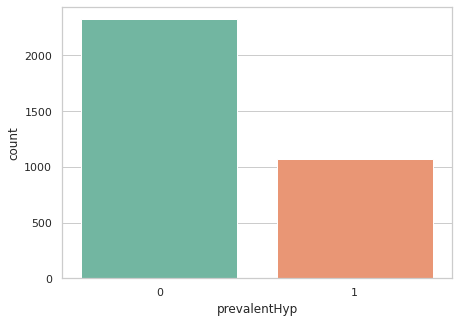

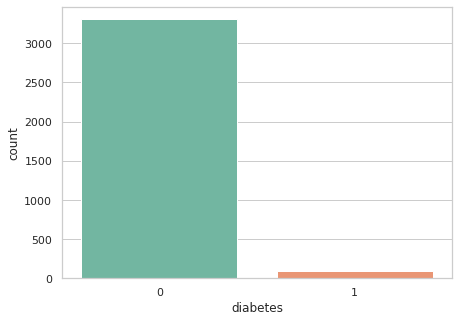

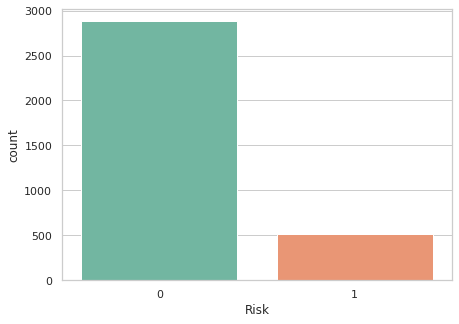

In [23]:
# Chart - 2 visualization code

cat_var = ['education','sex','smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','Risk']

# Cateogrical feature plotting
for i in cat_var:
    plt.figure(figsize=(7,5))
    sns.countplot(x = df[i])
    plt.show()

##### 1. Why did you pick the specific chart?

I picked the countplot chart because it is useful for visualizing the count or frequency of categorical variables.

##### 2. What is/are the insight(s) found from the chart?

By analyzing these charts, We can identify insights such as the fact that the majority of patients are female compared to male, most of the patients don't take BP medication, and a majority of the patients do not have a chance of developing CHD in the future.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis can have a positive impact on business decisions. For instance, targeting marketing towards the majority of female patients can help increase business growth. Similarly, providing additional resources and support to patients with a history of stroke or hypertension can lead to improved patient satisfaction and loyalty, resulting in positive business outcomes.

#### Chart - 3

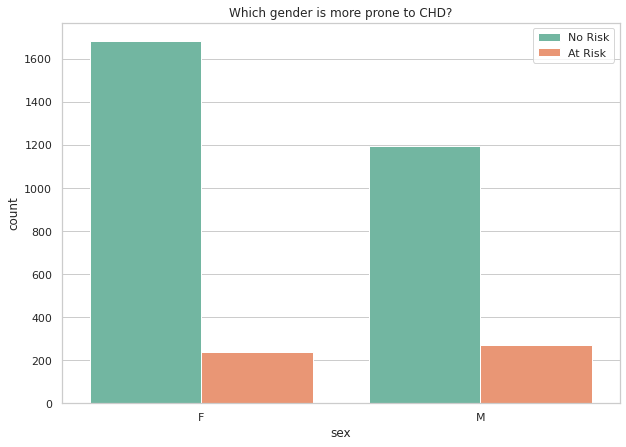

In [24]:
# Chart - 3 visualization code

plt.figure(figsize=(10,7))
sns.countplot(df.sex, hue=df.Risk)
plt.title('Which gender is more prone to CHD?')
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

To visualize the gender-wise distribution of CHD risk in the patient population.

##### 2. What is/are the insight(s) found from the chart?

*The* chart indicates that a higher number of male patients are at risk of developing CHD compared to female patients.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact by informing targeted marketing efforts and resource allocation towards male patients who are at a higher risk of developing CHD.

#### Chart - 4

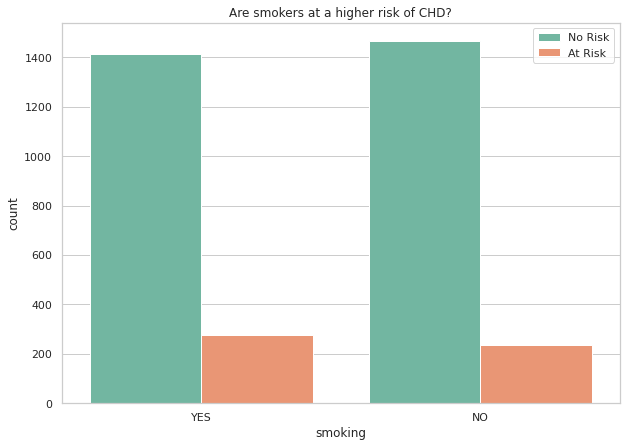

In [25]:
# Chart - 4 visualization code

plt.figure(figsize=(10,7))
sns.countplot(df.smoking, hue=df.Risk)
plt.title('Are smokers at a higher risk of CHD?')
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart because it provides insights into whether smoking is a risk factor for CHD.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that smokers are at a higher risk of developing CHD compared to non-smokers. This indicates that smoking is indeed a risk factor for CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can certainly help create a positive business impact by informing business decisions related to health campaigns and messaging. For example, this information can be used to target anti-smoking campaigns towards smokers and raise awareness about the risks associated with smoking, potentially leading to reduced smoking rates and improved public health outcomes.

#### Chart - 5

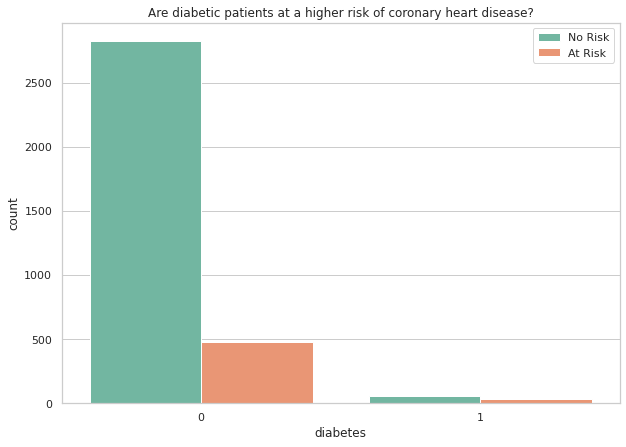

In [26]:
# Chart - 5 visualization code

plt.figure(figsize=(10,7))
sns.countplot(df.diabetes, hue=df.Risk)
plt.title('Are diabetic patients at a higher risk of coronary heart disease?')
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

To compare the counts of diabetic patients at no risk and at risk of coronary heart disease.

##### 2. What is/are the insight(s) found from the chart?

Based on the chart, it appears that there are a high number of patients who do not have diabetes but are at risk for coronary heart disease (CHD).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can help create a positive business impact by enabling businesses in the healthcare industry to better understand the relationship between diabetes and CHD risk. This information can be used to develop more effective prevention and treatment strategies for individuals who are at risk for CHD.

#### Chart - 6

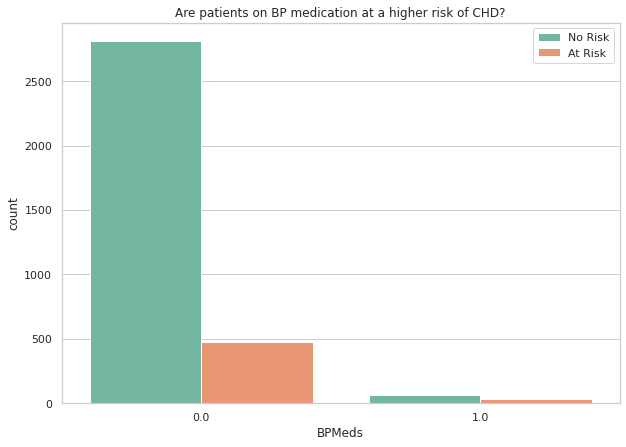

In [27]:
# Chart - 6 visualization code

plt.figure(figsize=(10,7))
sns.countplot(df.BPMeds, hue=df.Risk)
plt.title('Are patients on BP medication at a higher risk of CHD?')
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

To compare the counts of patients with and without CHD risk who are on blood pressure medication, and to visualize the relationship between medication use and CHD risk.

##### 2. What is/are the insight(s) found from the chart?

There are more patients who are not on blood pressure medication and are at risk for CHD compared to those who are on medication and at risk.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be used to develop more effective prevention and treatment strategies for patients with high blood pressure who are at risk for CHD. However, it is also important to note that the chart does not provide any causal relationship between blood pressure medication and CHD risk, and further research would be needed to establish any such relationship. 

#### Chart - 7

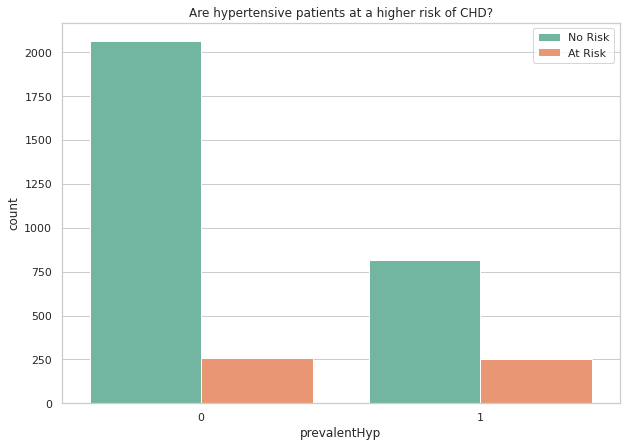

In [28]:
# Chart - 7 visualization code

plt.figure(figsize=(10,7))
sns.countplot(df.prevalentHyp, hue=df.Risk)
plt.title('Are hypertensive patients at a higher risk of CHD?')
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

This chart was likely chosen because it allows us to compare the counts of patients with and without CHD risk who have hypertension.

##### 2. What is/are the insight(s) found from the chart?

The number of patients with hypertension and without hypertension who are at risk for CHD is the same.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If a business operates in the healthcare industry, the insight that the number of patients with and without hypertension who are at risk for CHD is the same could potentially inform their product or service offerings, marketing strategies, or other business decisions.

#### Chart - 8

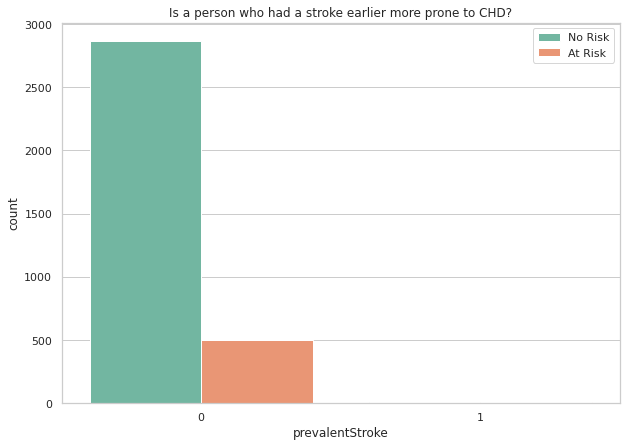

In [29]:
# Chart - 8 visualization code

plt.figure(figsize=(10,7))
sns.countplot(df.prevalentStroke, hue=df.Risk)
plt.title('Is a person who had a stroke earlier more prone to CHD?')
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

To compare the counts of patients with and without CHD risk who have a stroke in the past.

##### 2. What is/are the insight(s) found from the chart?

There are a few patients who have had a stroke in the past, and a high number of patients who have not had a stroke in the past but are at risk of CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help in creating a positive business impact by providing valuable information to healthcare professionals and policymakers. They can use this information to develop effective prevention and management strategies for CHD in people who have had a stroke earlier. This can help in reducing the incidence and burden of CHD, thereby improving the overall health outcomes of the population.

#### Chart - 9

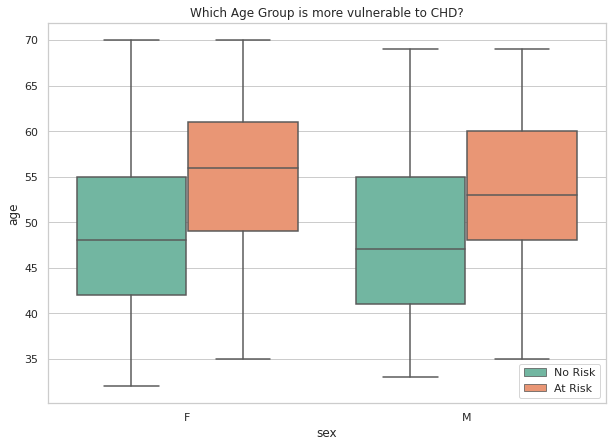

In [30]:
# Chart - 9 visualization code

plt.figure(figsize=(10,7))
ax = sns.boxplot(x=df['sex'], y=df['age'], hue=df.Risk)
plt.title('Which Age Group is more vulnerable to CHD?')
legend_handles, _ = ax.get_legend_handles_labels()          
ax.legend(legend_handles, ['No Risk', 'At Risk'], loc="best")
plt.show()

##### 1. Why did you pick the specific chart?

To know which age group is more vulnerable to CHD in both genders.

##### 2. What is/are the insight(s) found from the chart?

The male age group of 50 to 55 and the female age group of 55 to 60 are at risk of CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can help inform public health strategies to prevent and manage CHD. By identifying which age and sex groups are most vulnerable, healthcare providers and public health officials can develop targeted interventions to reduce the incidence and burden of the disease. 

#### Chart - 10

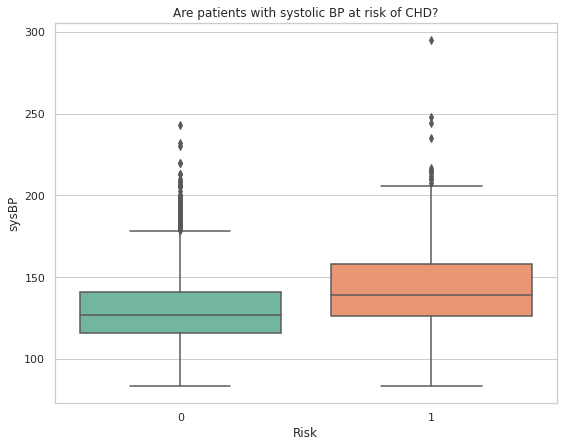

In [71]:
# Chart - 10 visualization 

plt.figure(figsize = (9,7))
sns.boxplot(x=df['Risk'], y=df['sysBP'])
plt.title('Are patients with systolic BP at risk of CHD?')
plt.show()

##### 1. Why did you pick the specific chart?

Systolic blood pressure (sysBP) for different levels of risk of coronary heart disease. A boxplot chart is a great way to display the central tendency, variability, and outliers of a sysBP variable across Risk.

##### 2. What is/are the insight(s) found from the chart?

Patients with a risk of CHD tend to have higher systolic blood pressure on average, as seen by the higher median and upper quartile values in the "high risk" group compared to the "low risk" group.

Both groups have some outliers, indicating that there are some patients with very high systolic blood pressure levels in each group.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Healthcare providers can use this information to identify patients who are at higher risk of CHD based on their systolic blood pressure levels and provide them with targeted interventions and treatments to manage their blood pressure and reduce their risk of CHD.

Health insurance companies can use this information to develop risk assessment models that take into account systolic blood pressure levels to better estimate the risk of CHD in their policyholders and offer them more tailored insurance products and services.

#### Chart - 11

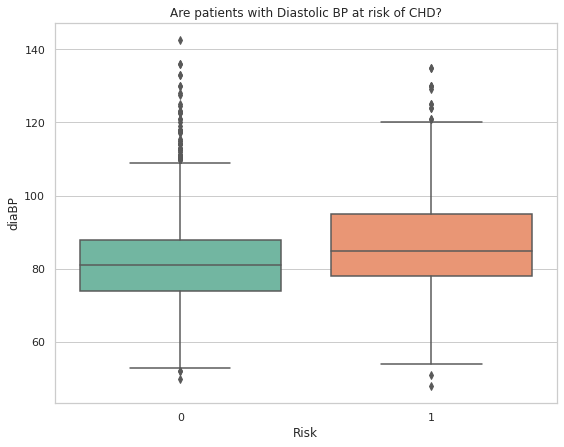

In [72]:
# Chart - 11 visualization code

plt.figure(figsize = (9,7))
sns.boxplot(x=df['Risk'], y=df['diaBP'])
plt.title('Are patients with Diastolic BP at risk of CHD?')
plt.show()

##### 1. Why did you pick the specific chart?

Diastolic blood pressure (diaBP) for different levels of risk of coronary heart disease. A boxplot chart is a great way to display the central tendency, variability, and outliers of a diaBP variable across Risk.

##### 2. What is/are the insight(s) found from the chart?

Patients with a risk of CHD tend to have higher diastolic  blood pressure on average, as seen by the higher median and upper quartile values in the "high risk" group compared to the "low risk" group.

Both groups have some outliers, indicating that there are some patients with very high diastolic  blood pressure levels in each group.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Healthcare providers can use this information to identify patients who are at higher risk of CHD based on their diastolic blood pressure levels and provide them with targeted interventions and treatments to manage their blood pressure and reduce their risk of CHD.

Health insurance companies can use this information to develop risk assessment models that take into account diastolic blood pressure levels to better estimate the risk of CHD in their policyholders and offer them more tailored insurance products and services.

#### Chart - 12

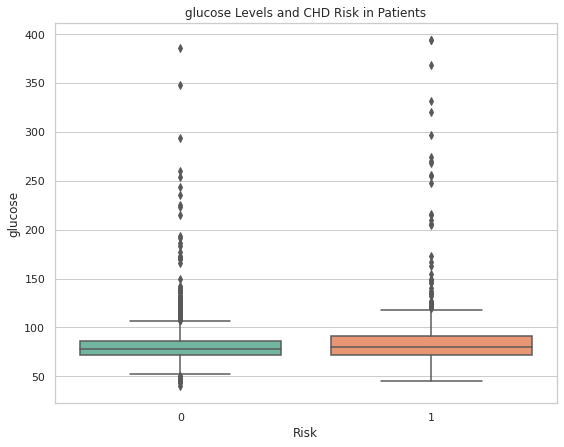

In [73]:
# Chart - 12 visualization code

plt.figure(figsize = (9,7))
sns.boxplot(y=df['glucose'], x=df['Risk'])
plt.title('glucose Levels and CHD Risk in Patients')
plt.show()

##### 1. Why did you pick the specific chart?

To determine the glucose levels of patients with or without CHD.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can see that the median glucose levels for patients with or without CHD are same.
Both groups have some outliers, indicating that there are some patients with very high glucose levels in both group.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By understanding the relationship between glucose levels and CHD risk, healthcare providers can better identify patients who are at high risk for developing cardiovascular disease and take appropriate measures to manage their glucose levels and reduce their risk.

#### Chart - 13

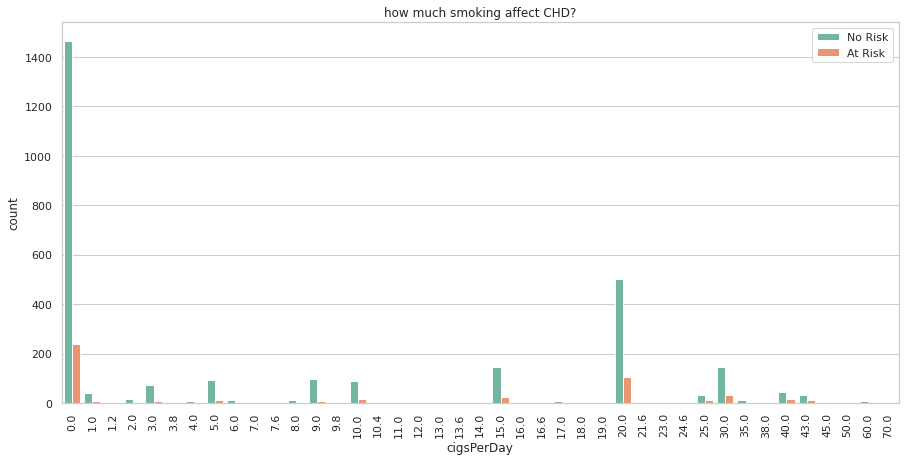

In [74]:
# Chart - 13 visualization code

plt.figure(figsize = (15,7))
sns.countplot(df.cigsPerDay, hue=df.Risk)
plt.title('how much smoking affect CHD?')
plt.legend(['No Risk','At Risk'])
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To determine how many patients with or without CHD how many cigarettes  smoke per day.

##### 2. What is/are the insight(s) found from the chart?

We can see that the proportion of patients with no risk of CHD is highest among those who do not smoke at all.We can also see a high number of patients at risk of CHD who do not smoke a single cigarette per day compared to those who smoke 20 or more cigarettes per day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By understanding the relationship between smoking habits and CHD risk, healthcare providers can better identify patients who are at high risk for developing cardiovascular disease and take appropriate measures to manage their smoking habits and reduce their risk.

#### Chart - 14 - Correlation Heatmap

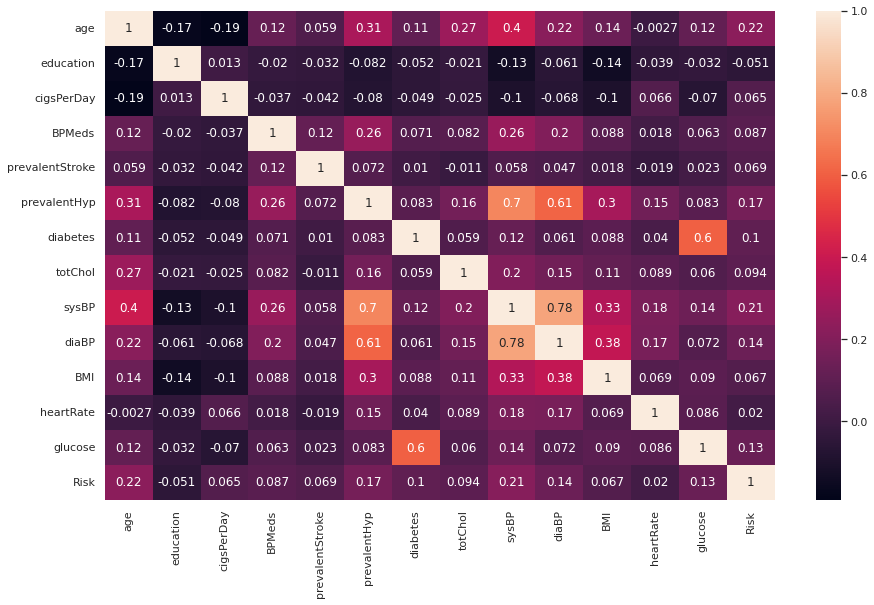

In [75]:
# Correlation Heatmap visualization code

plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

To determine the correlation between different variables.

##### 2. What is/are the insight(s) found from the chart?

We can see from the above chart that there is a high correlation between sysBP and diaBP, as well as between sysBP and prevalentHyp, diaBP and prevalentHyp, and diabetes and glucose

#### Chart - 15 - Pair Plot 

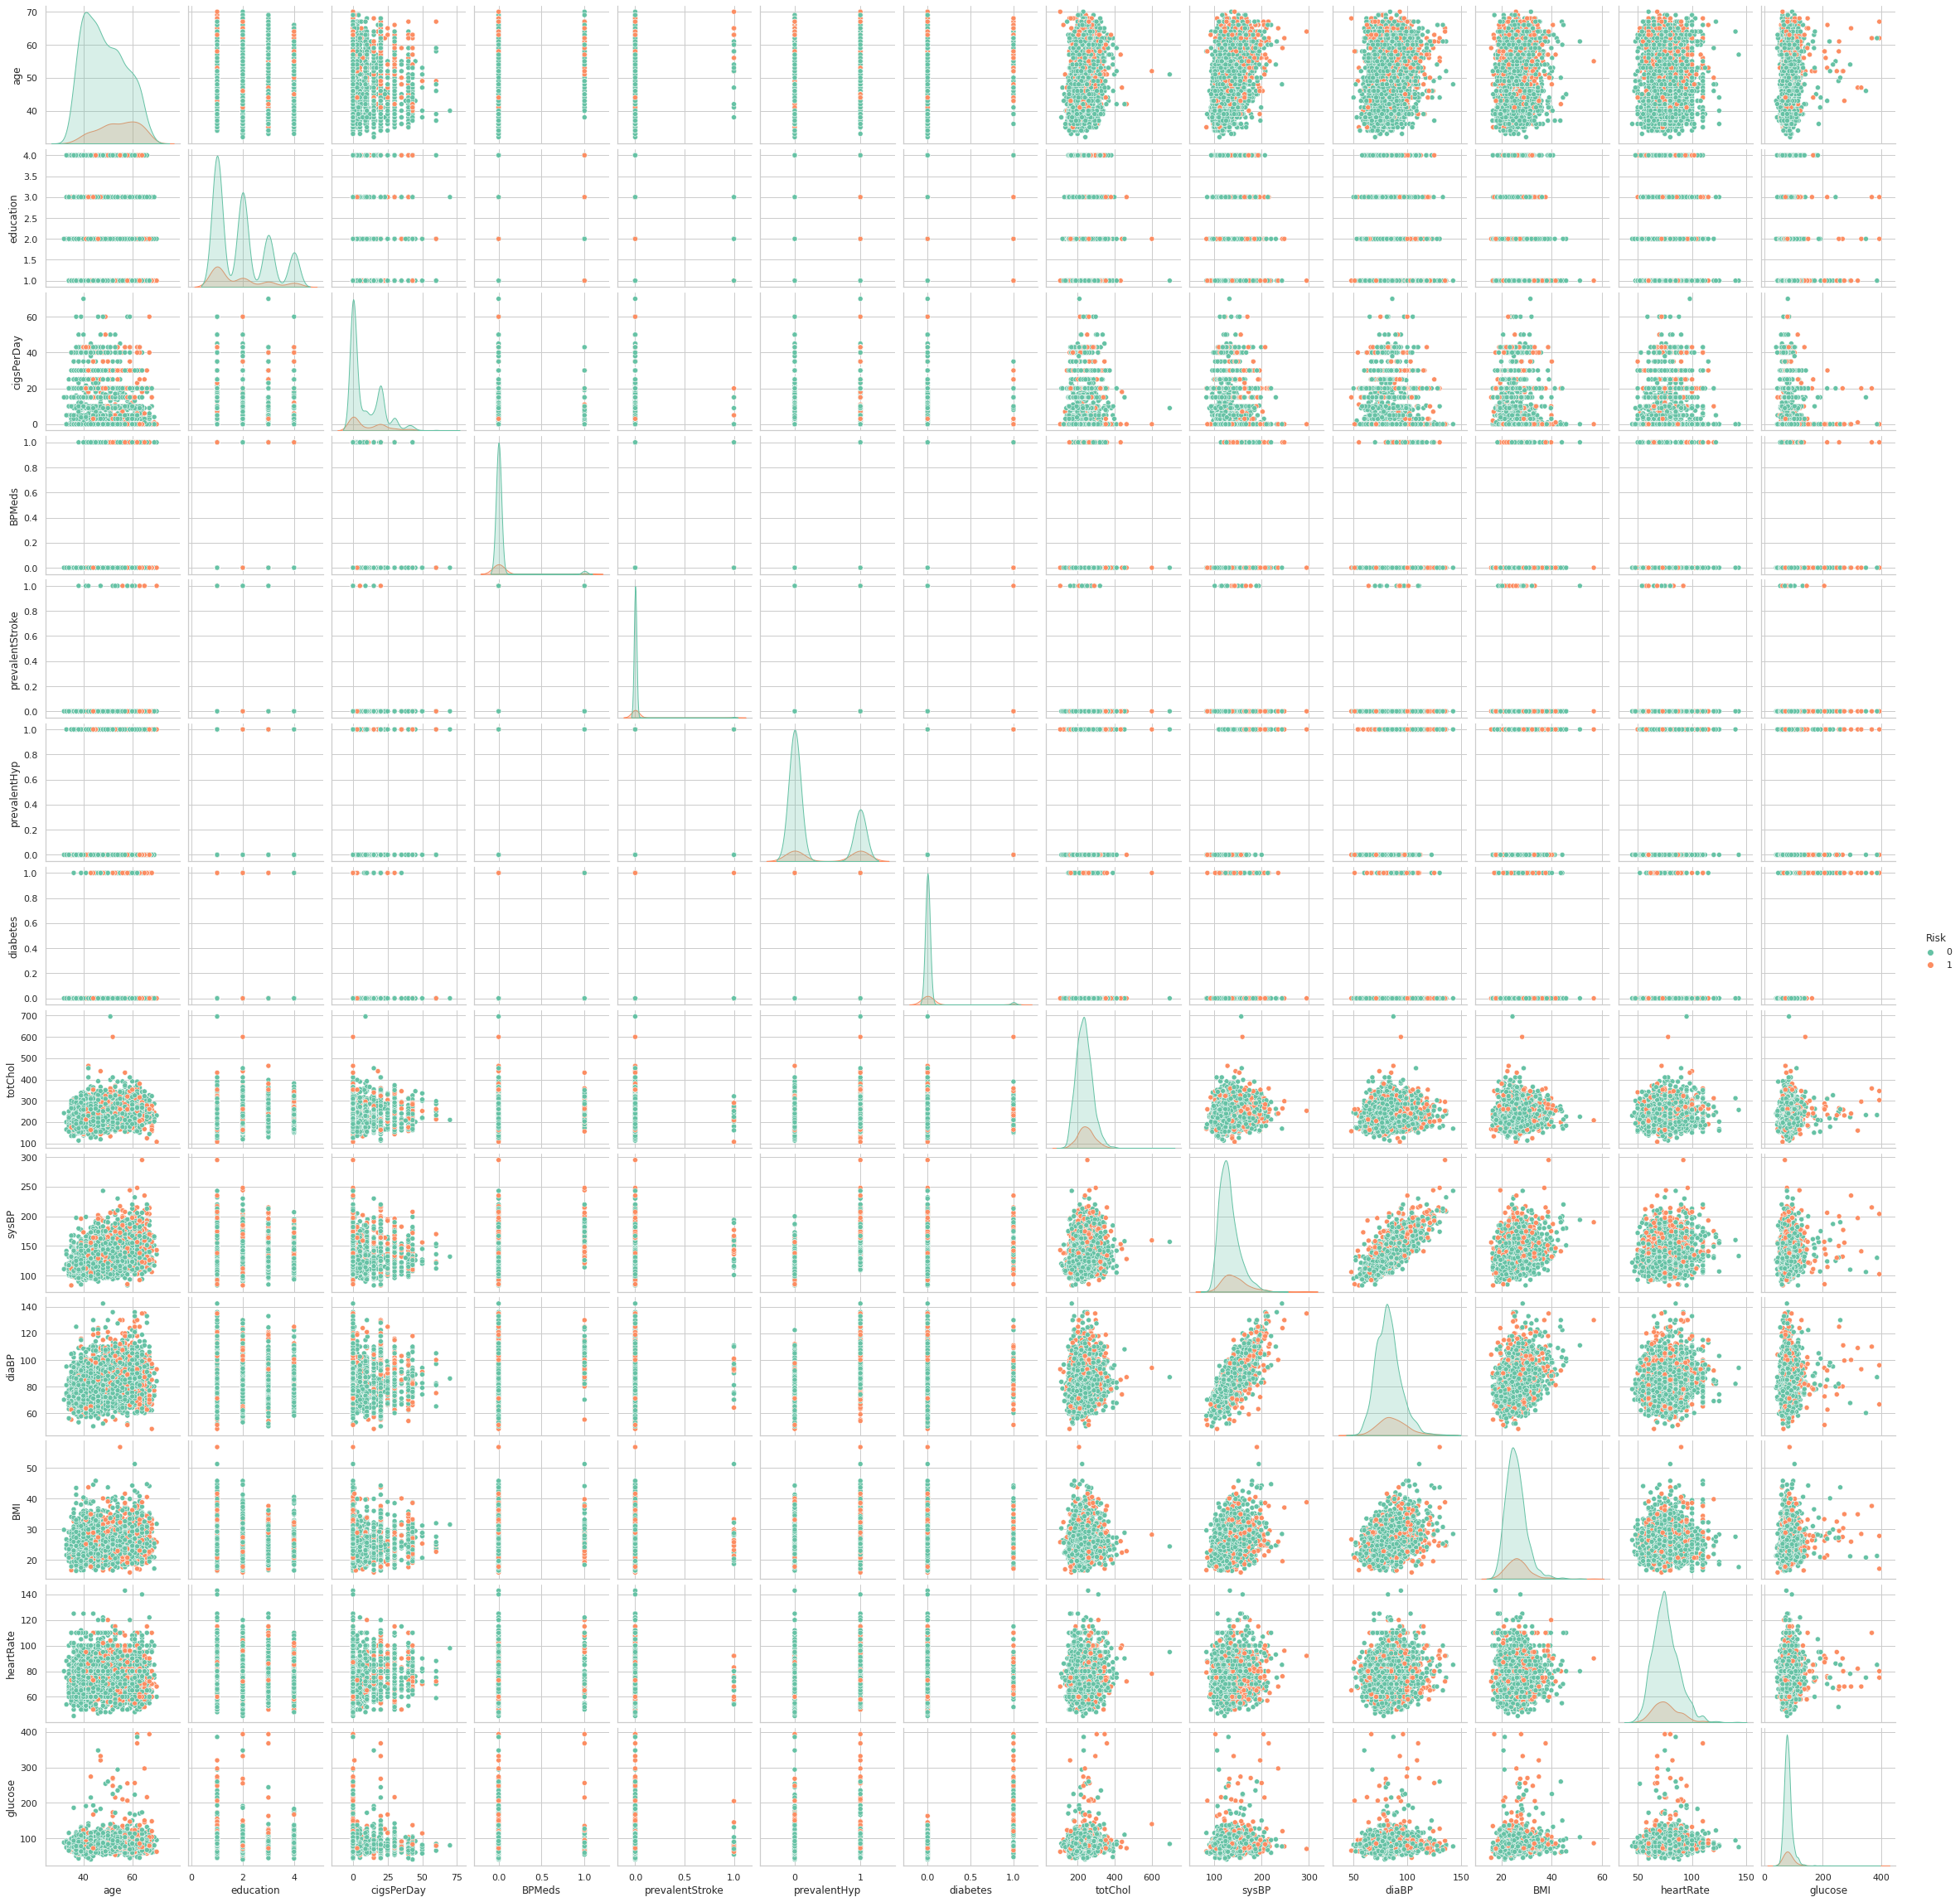

In [76]:
# Pair Plot visualization code
sns.pairplot(df, hue='Risk')

##### 1. Why did you pick the specific chart?

It is a great way to visualize the pairwise relationships between different variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?

These are some examples of possible insights that be found from the pair plot.we can see that there is a positive correlation between age and CHD risk, with older patients having a higher risk of developing CHD. We can also see that there is a positive correlation between systolic blood pressure (sysBP) and CHD risk, as well as between diastolic blood pressure (diaBP) and CHD risk.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.  The mean age of patients with a risk of CHD is different from the mean age of patients without a risk of CHD (μ1 ≠ μ2).
2. There is an association between diabetes and risk.
3. The mean systolic blood pressure of patients with a risk of CHD is different from the mean systolic blood pressure of patients without a risk of CHD (μ1 ≠ μ2).


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): The mean age of patients with a risk of CHD is the same as the mean age of patients without a risk of CHD (μ1 = μ2).

Alternative hypothesis (H1): The mean age of patients with a risk of CHD is different from the mean age of patients without a risk of CHD (μ1 ≠ μ2).


#### 2. Perform an appropriate statistical test.

In [79]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Create subsets of data for patients with and without CHD
CHD_patients = df[df['Risk'] == 1]['age']
non_CHD_patients = df[df['Risk'] == 0]['age']

# Conduct two-sample t-test
t_stat, p_value = ttest_ind(CHD_patients, non_CHD_patients, equal_var=False)

# Print results
print('t-statistic:', t_stat)
print('p-value:', p_value)

# Make statement about the result
if p_value < 0.05:
    print(f'The mean age of patients with a risk of CHD is significantly different from the mean age of patients without a risk of CHD.')
else:
    print(f'There is no significant difference in the mean age of patients with and without a risk of CHD.')

t-statistic: 13.771446174098248
p-value: 1.8455541117753288e-38
The mean age of patients with a risk of CHD is significantly different from the mean age of patients without a risk of CHD.


##### Which statistical test have you done to obtain P-Value?

We used the t-test to obtain the p-value.

##### Why did you choose the specific statistical test?

We want to determine whether the mean age of patients with a risk of CHD is different to the mean age of patients without a risk of CHD or not.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): There is no association between diabetes and risk.

Alternative hypothesis (Ha): There is an association between diabetes and risk.

#### 2. Perform an appropriate statistical test.

In [78]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create a contingency table
cont_table = pd.crosstab(df['diabetes'], df['Risk'])

# Display the contingency table
print(cont_table)

# Perform chi-squared test
stat, p, dof, expected = chi2_contingency(cont_table)

# Print the results
print('Chi-squared statistic:', stat)
print('P-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

# Make statement about the result
if p < 0.05:
    print('There is a significant association between diabetes and risk.')
else:
    print('There is no significant association between diabetes and risk.')


Risk         0    1
diabetes           
0         2825  478
1           54   33
Chi-squared statistic: 34.63203270914867
P-value: 3.982978687382329e-09
Degrees of freedom: 1
Expected frequencies: [[2805.11415929  497.88584071]
 [  73.88584071   13.11415929]]
There is a significant association between diabetes and risk.


##### Which statistical test have you done to obtain P-Value?

We used the chi-square test to obtain the p-value.

##### Why did you choose the specific statistical test?

We want to determine whether there is an association between diabetes and risk or not.



### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): The mean systolic blood pressure of patients with a risk of CHD is the same as the mean systolic blood pressure of patients without a risk of CHD (μ1 = μ2).

Alternative hypothesis (H1): The mean systolic blood pressure of patients with a risk of CHD is different from the mean systolic blood pressure of patients without a risk of CHD (μ1 ≠ μ2).

#### 2. Perform an appropriate statistical test.

In [80]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Split the data into two groups based on risk of heart disease
group_1 = df.loc[df['Risk'] == 0, 'sysBP']
group_2 = df.loc[df['Risk'] == 1, 'sysBP']

# Conduct two-sample t-test assuming unequal variances
t_stat, p_value = ttest_ind(group_1, group_2, equal_var=False)

# Print the results 
print('t-statistic:', t_stat)
print('p-value:', p_value)

# Make statement about the result
if p_value < 0.05:
    print('The mean systolic blood pressure of patients with a risk of CHD is different from the mean systolic blood pressure of patients without a risk of CHD.')
else:
    print('The mean systolic blood pressure of patients with a risk of CHD is the same as the mean systolic blood pressure of patients without a risk of CHD.')

t-statistic: -10.53450070402408
p-value: 5.515334446665673e-24
The mean systolic blood pressure of patients with a risk of CHD is different from the mean systolic blood pressure of patients without a risk of CHD.


##### Which statistical test have you done to obtain P-Value?

We used the t-test to obtain the p-value.

##### Why did you choose the specific statistical test?

We want to determine whether the mean systolic blood pressure of patients with a risk of CHD is different to the mean systolic blood pressure of patients without a risk of CHD or not.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [40]:
# Already Done

### 2. Handling Outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'education'),
  Text(2, 0, 'cigsPerDay'),
  Text(3, 0, 'BPMeds'),
  Text(4, 0, 'prevalentStroke'),
  Text(5, 0, 'prevalentHyp'),
  Text(6, 0, 'diabetes'),
  Text(7, 0, 'totChol'),
  Text(8, 0, 'sysBP'),
  Text(9, 0, 'diaBP'),
  Text(10, 0, 'BMI'),
  Text(11, 0, 'heartRate'),
  Text(12, 0, 'glucose'),
  Text(13, 0, 'Risk')])

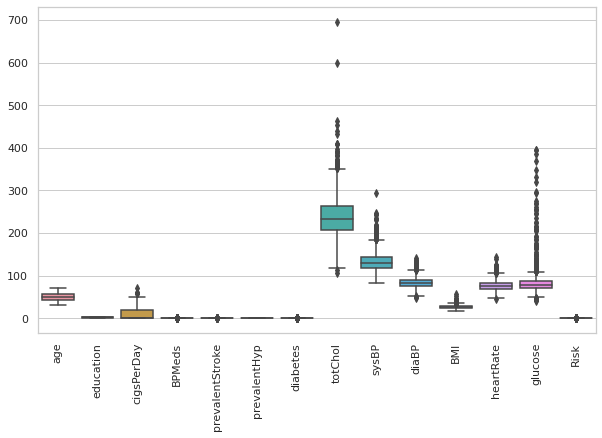

In [81]:
# Handling Outliers & Outlier treatments
# Ploting boxplot

plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'education'),
  Text(2, 0, 'cigsPerDay'),
  Text(3, 0, 'BPMeds'),
  Text(4, 0, 'prevalentStroke'),
  Text(5, 0, 'prevalentHyp'),
  Text(6, 0, 'diabetes'),
  Text(7, 0, 'totChol'),
  Text(8, 0, 'sysBP'),
  Text(9, 0, 'diaBP'),
  Text(10, 0, 'BMI'),
  Text(11, 0, 'heartRate'),
  Text(12, 0, 'glucose'),
  Text(13, 0, 'Risk')])

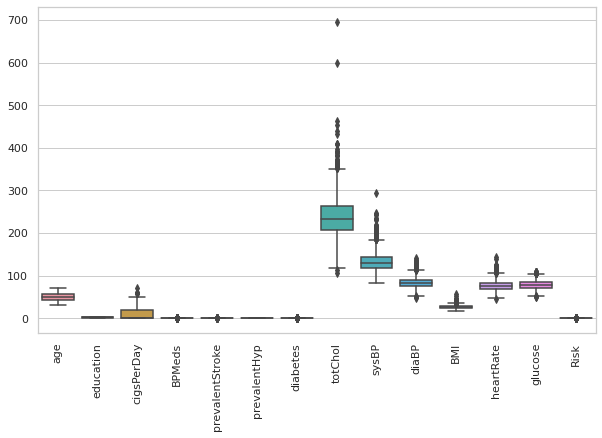

In [82]:
# Handling outlier
outlier_col = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

# calculate interquartile range
for col in outlier_col:
  Q1= df[col].quantile(0.25)
  Q3= df[col].quantile(0.75)
  IQR= (Q3-Q1)
  cut_off = IQR * 1.5
  lower_bound, upper_bound = Q1 - cut_off, Q3 + cut_off

# Identify the outliers using the lower and upper bounds
outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

# Handle the outliers by replacing them with the column's median value
df.loc[outliers, col] = df[col].median()
  
# Create a boxplot of the column
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)

##### What all outlier treatment techniques have you used and why did you use those techniques?

We used the interquartile range (IQR) technique to measure the spread of the middle half of the data and assess the variability, which indicates where most of the values lie. Larger values indicate that the central portion of the data is spread out further.



### 3. Categorical Encoding

In [83]:
# Encode your categorical columns
df['sex'] = df['sex'].replace({'F': 0, 'M': 1})
df['smoking'] = df['smoking'].replace({'NO':0, 'YES':1})

#### What all categorical encoding techniques have you used & why did you use those techniques?

We are used Label Encoding to convert the categorical columns "sex" and "smoking" into numerical columns. Specifically, we assign 0 to "female" and 1 to "male" in the "sex" column, and 0 to "NO" and 1 to "YES" in the "smoking" column. We use this technique because it assigns a unique numerical value to each category in a categorical column.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [84]:
# Manipulate Features to minimize feature correlation and create new features
# Function to categorize systolic and diastolic blood pressure
def categorize_blood_pressure(sysBP, diaBP):
    if sysBP < 120 and diaBP < 80:
        return 0 # 'Optimal'
    elif 120 <= sysBP <= 129 and diaBP < 80:
        return 1 # 'Normal'
    elif 130 <= sysBP <= 139 or 80 <= diaBP <= 89:
        return 2 # 'High Normal'
    elif 140 <= sysBP <= 159 or 90 <= diaBP <= 99:
        return 3 # 'Mild Hypertension'
    else:
        return 4 # 'Severe Hypertension'

In [85]:
df['Hypertension'] = df.apply(lambda x: categorize_blood_pressure(x['sysBP'],x['diaBP']),axis=1)
df.head()

,age,education,sex,smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk,Hypertension
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,27.736,90.0,80.0,1,2
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770,72.0,75.0,0,3
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350,88.0,94.0,0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260,68.0,94.0,1,2
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420,70.0,77.0,0,2


In [86]:
# Function to categorize glucose levels
def categorize_glucose(glucose):
    if glucose < 70:
        return 0 # 'Low'
    elif 70 <= glucose <= 109:
        return 1 # 'Normal'
    elif 110 <= glucose <= 139:
        return 2 # 'Elevate'
    elif 140 <= glucose <= 199:
        return 3 # 'High'
    else:
        return 4 # 'Very High'

In [87]:
df['Diabetes'] = df['glucose'].apply(lambda x: categorize_glucose(x))
df.head()

,age,education,sex,smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk,Hypertension,Diabetes
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,27.736,90.0,80.0,1,2,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770,72.0,75.0,0,3,1
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350,88.0,94.0,0,0,1
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260,68.0,94.0,1,2,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420,70.0,77.0,0,2,1


#### 2. Feature Selection

In [88]:
# Select your features wisely to avoid overfitting
df.drop(columns=['prevalentHyp', 'sysBP', 'diaBP', 'glucose', 'diabetes','smoking','prevalentStroke','BPMeds'], inplace=True)

In [89]:
df.head()

,age,education,sex,cigsPerDay,totChol,BMI,heartRate,Risk,Hypertension,Diabetes
0,64,2.0,0,3.0,221.0,27.736,90.0,1,2,1
1,36,4.0,1,0.0,212.0,29.770,72.0,0,3,1
2,46,1.0,0,10.0,250.0,20.350,88.0,0,0,1
3,50,1.0,1,20.0,233.0,28.260,68.0,1,2,1
4,64,1.0,0,30.0,241.0,26.420,70.0,0,2,1


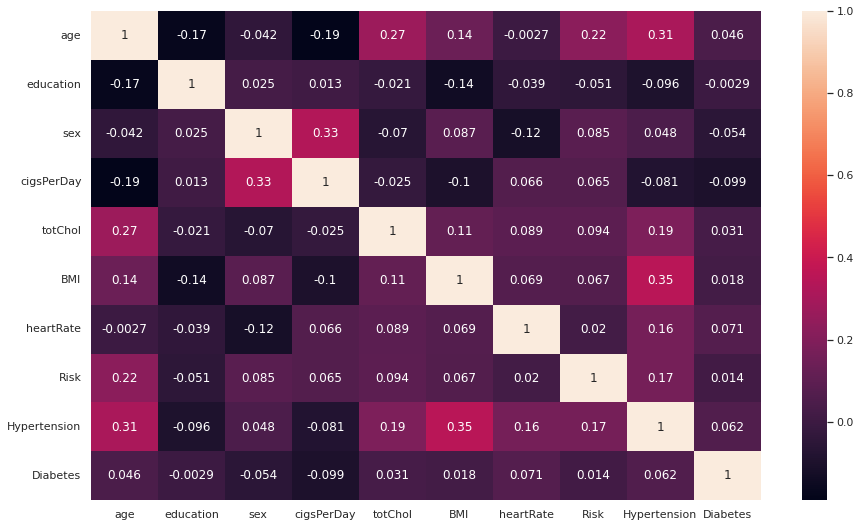

In [90]:
# Correlation Heatmap visualization code

plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [91]:
# Define the independent and dependent variable
x = df.drop('Risk',axis=1)
y = df["Risk"]

# print the shape of X and Y
print(f"The Number of Rows and Columns in X is {x.shape} respectively.")
print(f"The Number of Rows and Columns in Y is {y.shape} respectively.")

The Number of Rows and Columns in X is (3390, 9) respectively.
The Number of Rows and Columns in Y is (3390,) respectively.


##### What all feature selection methods have you used  and why?

We used heatmap correlation to select important features, but this technique showed that certain features are highly correlated with each other, which may result in overfitting of the model.

##### Which all features you found important and why?

age, education, sex, smoking, totChol, BMI, heartRate, Risk, Hypertension, Diabetes are important features because the target feature 'Risk' is dependent on all of them.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [56]:
# Transform Your data
#No need to transform the data

### 6. Data Scaling

In [92]:
# Scaling your data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [93]:
x_scaled

array([[ 1.6827831 ,  0.05305814, -0.87342459, ...,  1.17171075,
         0.23242893,  0.46749097],
       [-1.57621005,  2.01881889,  1.14491853, ..., -0.33224572,
         1.07334042,  0.46749097],
       [-0.41228392, -0.92982223, -0.87342459, ...,  1.00460448,
        -1.44939405,  0.46749097],
       ...,
       [-0.64506915,  1.03593852,  1.14491853, ..., -0.24869259,
         1.91425191,  0.46749097],
       [ 1.21721265, -0.92982223,  1.14491853, ...,  0.33617938,
         1.91425191,  0.46749097],
       [ 0.51885698,  1.03593852, -0.87342459, ...,  0.25262624,
        -0.60848256,  0.46749097]])

##### Which method have you used to scale you data and why?

We used the standardization feature scaling method to normalize the range of independent features in the data.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No. We have already dropped unnecessary and highly correlated columns and are now left with the important and necessary columns.

### 8. Data Splitting

In [94]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(2712, 9)
(678, 9)


##### What data splitting ratio have you used and why? 

We have made the use of 80% and 20% Training and Testing data respectively.The data should be divided in such a way that neither of them is too high, which is more dependent on the ammount of data we have. If the data is too small, then no split will give satisfactory variance so we'll have to do cross-validation, but if the data is huge then it doesn’t really matter whether we choose an 80:20 split or a 90:10 split (indeed we may choose to use less training data as otherwise, it might be more computationally intensive).

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes.We do not have an equal number of observations for each category in the target variable.

In [95]:
# Count 0/1 class in train data
class_counts = np.bincount(y_train)
num_zeros = class_counts[0]
num_ones = class_counts[1]

print("Patients without Risk:", num_zeros)
print("Patients with Risk:", num_ones)

Patients without Risk: 2305
Patients with Risk: 407


In [96]:
# Balance the train data
ros = RandomOverSampler(random_state=0)

# fit the train data
x_train, y_train = ros.fit_resample(x_train,y_train)
print('Resampled shape of train data', len(x_train))

Resampled shape of train data 4610


In [97]:
# Count 0/1 class labels in train data after random over sampling
class_counts = np.bincount(y_train)
num_zeros = class_counts[0]
num_ones = class_counts[1]

print("Patients without Risk:", num_zeros)
print("Patients with Risk:", num_ones)

Patients without Risk: 2305
Patients with Risk: 2305


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

We used random oversampling to balance the imbalanced dataset by duplicating observations from the minority class in the training dataset. This technique helps us avoid losing valuable observations.

## ***7. ML Model Implementation***

### ML Model - 1

In [98]:
# ML Model - 1 Implementation
lr = LogisticRegression()

# Fit the Algorithm
lr.fit(x_train, y_train)

# Checking intercept
print(lr.intercept_)

# Checking Coefficent
print(lr.coef_)

# Predict on the model
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

# calculating accuracy on train and test set
lr_train_acc = accuracy_score(y_train, y_pred_train)
lr_test_acc = accuracy_score(y_test, y_pred_test)

print("The accuracy on train dataset is", lr_train_acc)
print("The accuracy on test dataset is", lr_test_acc)

[-0.23566227]
[[ 0.60366938 -0.03810546  0.1786053   0.28803401  0.17156602  0.02502078
  -0.05913412  0.32745797 -0.01280944]]
The accuracy on train dataset is 0.6622559652928417
The accuracy on test dataset is 0.6091445427728613


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

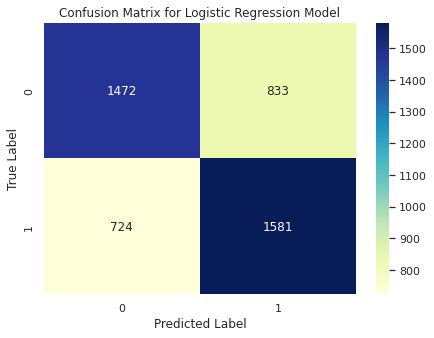


----------Classification report of Train data-----------
              precision    recall  f1-score   support

           0       0.67      0.64      0.65      2305
           1       0.65      0.69      0.67      2305

    accuracy                           0.66      4610
   macro avg       0.66      0.66      0.66      4610
weighted avg       0.66      0.66      0.66      4610

roc_auc_score
0.6622559652928417


In [99]:
# Visualizing evaluation Metric Score chart

# Create confusion matrix
cm = confusion_matrix(y_train, y_pred_train)

# Plot the confusion matrix 
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# Classification report
print("\n"'----------Classification report of Train data-----------')
print(classification_report(y_train, y_pred_train))

# Calculate roc-auc score
print("roc_auc_score")
print(metrics.roc_auc_score(y_train, y_pred_train))

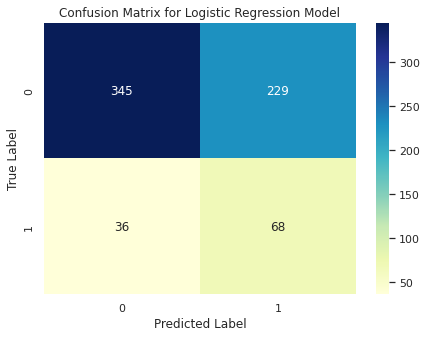


----------Classification report of Test data-----------
              precision    recall  f1-score   support

           0       0.91      0.60      0.72       574
           1       0.23      0.65      0.34       104

    accuracy                           0.61       678
   macro avg       0.57      0.63      0.53       678
weighted avg       0.80      0.61      0.66       678

roc_auc_score
0.6274457250067007


In [100]:
# Visualizing evaluation Metric Score chart

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix 
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# Classification report
print("\n"'----------Classification report of Test data-----------')
print(classification_report(y_test, y_pred_test))

# Calculate roc-auc score
print("roc_auc_score")
print(metrics.roc_auc_score(y_test, y_pred_test))

#### 2. Cross- Validation & Hyperparameter Tuning

In [101]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the Logistic Regression and the grid of parameters
lr = LogisticRegression(max_iter=10000)
param_grid = {'solver':['newton-cg', 'lbfgs', 'liblinear'], 'penalty':['10','l2','14','16','20','18'], 'C':[1000, 100, 10, 1.0, 0.1, 0.01, 0.001]}

# Define the grid search and cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1', error_score=0, verbose=3)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding F1 score
print('Best hyperparameters:', grid_search.best_params_)
print('Best F1 score:', grid_search.best_score_)

# Fit the Algorithm
best_lr = LogisticRegression(**grid_search.best_params_)
best_lr.fit(x_train, y_train)

# Predict on the model
y_pred_train = best_lr.predict(x_train)
y_pred_test = best_lr.predict(x_test)

Fitting 3 folds for each of 126 candidates, totalling 378 fits
Best hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1 score: 0.7034983895996199


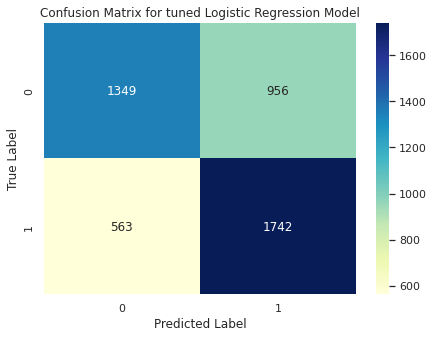


----------Classification report of Train data-----------
              precision    recall  f1-score   support

           0       0.71      0.59      0.64      2305
           1       0.65      0.76      0.70      2305

    accuracy                           0.67      4610
   macro avg       0.68      0.67      0.67      4610
weighted avg       0.68      0.67      0.67      4610

roc_auc_score
0.6704989154013016


In [102]:
# Visualizing evaluation Metric Score chart

# Create confusion matrix
cm = confusion_matrix(y_train, y_pred_train)

# Plot the confusion matrix 
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for tuned Logistic Regression Model')
plt.show()

# Classification report
print("\n"'----------Classification report of Train data-----------')
print(classification_report(y_train, y_pred_train))

# Calculate roc-auc score
print("roc_auc_score")
print(metrics.roc_auc_score(y_train, y_pred_train))

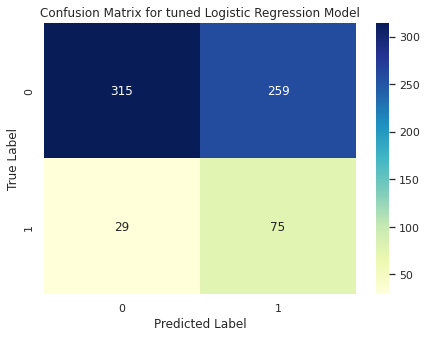


----------Classification report of Test data-----------
              precision    recall  f1-score   support

           0       0.92      0.55      0.69       574
           1       0.22      0.72      0.34       104

    accuracy                           0.58       678
   macro avg       0.57      0.63      0.51       678
weighted avg       0.81      0.58      0.63       678

roc_auc_score
0.6349671669793622


In [103]:
# Visualizing evaluation Metric Score chart

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix 
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for tuned Logistic Regression Model')
plt.show()

# Classification report
print("\n"'----------Classification report of Test data-----------')
print(classification_report(y_test, y_pred_test))

# Calculate roc-auc score
print("roc_auc_score")
print(metrics.roc_auc_score(y_test, y_pred_test))

##### Which hyperparameter optimization technique have you used and why?

we used gridsearch CV hyperparameter optimization technique.It aims to find the best hyperparameters to improve the model's performance. Instead of manually searching for the optimal hyperparameters, GridSearchCV performs an exhaustive search over all the specified hyperparameters and their values. This can be time-consuming and expensive, especially if there are many hyperparameters involved. However, GridSearchCV also incorporates cross-validation, which is used during the model training process. 

That's why we used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, the model achieved a precision of 71%, recall of 69%, and an f1-score of 64% for patients classified as "No Risk." However, for patients classified as "Risk" the precision was 65%, recall was 76%, and f1-score was 70%. The accuracy was 58% and the average precision, recall, and f1-score were 68%, 67%, and 67% respectively, with a roc auc score of 67%.

For testing dataset, the model achieved a precision of 92%, recall of 55%, and an f1-score of 68% for patients classified as "No Risk." For patients classified as "Risk" the precision was 22%, recall was 72%, and f1-score was 34%. The accuracy was 87%, and the average precision, recall, and f1-score were 57%, 63%, and 51% respectively, with a roc auc score of 63%.

The model showed a slight improvement in the training data but a slight deterioration in the test data.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [64]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [65]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [66]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [67]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [69]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [70]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***